https://www.kaggle.com/datasets/anuragupadhyaya/anticancer-peptides-data-set

In [1]:
using Random

"""
Construct a binary vector. By default 10000 elements long.
"""
bitHDV(N::Int=10000) = bitrand(N)


"""
Bundles binary hyperdimensional vectors based on the element-wise majority rule.
"""
function bitadd(vectors::BitVector ...)
    v = reduce(.+, vectors)
    n = length(vectors) / 2
    x = [i > n ? 1 : i < n ? 0 : rand(0:1) for i in v]
    return convert(BitVector, x)
end


"""
Binds binary hyperdimensional vectors based on an element-wise XOR gate.
"""
bitbind(vectors::BitVector ...) =  reduce(.⊻, vectors)


"""
Permutes a binary hyperdimensional vector by an adjustable circular shift.
"""
bitperm(vector::BitVector, k::Int=1) = circshift(vector, k)


"""
Calculates the Hamming distance between two binary vectors.
"""
hamming(x::BitVector, y::BitVector) = sum(x .!= y)/length(x)

hamming

Data contains sequences of four classes: very active in anticancer acitivity, moderately active, inactive (exp) and inactive (virtual) (difference?)

In [28]:
using DataFrames, CSV
data = CSV.read("/home/mfat/Master-Thesis/data/ProtExdata/ACPs_Breast_cancer.csv", DataFrame)

,ID,sequence,class
,Int64,String,String31
1,1,AAWKWAWAKKWAKAKKWAKAA,mod. active
2,2,AIGKFLHSAKKFGKAFVGEIMNS,mod. active
3,3,AWKKWAKAWKWAKAKWWAKAA,mod. active
4,4,ESFSDWWKLLAE,mod. active
5,5,ETFADWWKLLAE,mod. active
6,6,ETFSDWWKLLAE,mod. active
7,7,FAKALAKLAKKLL,mod. active
8,8,FAKALKALLKALKAL,inactive - exp
9,9,FAKFLAKFLKKAL,mod. active


In [29]:
unique(data.class)
class_num = [i == "very active" ? 1 : i == "mod. active" ? 2 : i == "inactive - exp" ? 3 : 4 for i in data.class]
data[!, :class_num] = class_num
data2 = data[data.class_num .!= 4, :]
first(data, 10)
first(data2, 10)

,ID,sequence,class,class_num
,Int64,String,String31,Int64
1,1,AAWKWAWAKKWAKAKKWAKAA,mod. active,2
2,2,AIGKFLHSAKKFGKAFVGEIMNS,mod. active,2
3,3,AWKKWAKAWKWAKAKWWAKAA,mod. active,2
4,4,ESFSDWWKLLAE,mod. active,2
5,5,ETFADWWKLLAE,mod. active,2
6,6,ETFSDWWKLLAE,mod. active,2
7,7,FAKALAKLAKKLL,mod. active,2
8,8,FAKALKALLKALKAL,inactive - exp,3
9,9,FAKFLAKFLKKAL,mod. active,2


Attach to each amino acid a random hdv (improvement should be seen in more realistic representations, hdvs from embeddings)

In [30]:
AA_list = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', 'O', 'U', 'B', 'J', 'Z', 'X']
AA_hdv = [bitHDV() for i in AA_list]
AA_dict = Dict(zip(AA_list, AA_hdv))

Dict{Char, BitVector} with 26 entries:
  'E' => [1, 1, 0, 0, 0, 1, 0, 0, 0, 1  …  0, 1, 0, 0, 0, 0, 1, 0, 0, 1]
  'Z' => [1, 1, 0, 0, 0, 0, 1, 0, 1, 1  …  0, 1, 1, 0, 1, 1, 0, 1, 0, 1]
  'X' => [0, 1, 0, 0, 0, 1, 0, 1, 0, 1  …  0, 1, 1, 1, 0, 1, 0, 0, 0, 0]
  'C' => [1, 1, 1, 1, 1, 1, 0, 1, 1, 0  …  0, 0, 0, 1, 1, 0, 0, 0, 0, 1]
  'B' => [0, 0, 1, 1, 1, 0, 1, 1, 0, 0  …  0, 1, 0, 1, 0, 1, 1, 0, 1, 0]
  'D' => [0, 1, 0, 0, 1, 1, 0, 0, 0, 1  …  1, 1, 1, 0, 1, 0, 1, 1, 1, 0]
  'A' => [1, 0, 0, 0, 1, 0, 1, 1, 0, 0  …  1, 0, 0, 1, 1, 1, 0, 0, 1, 0]
  'R' => [0, 1, 1, 0, 0, 0, 1, 1, 0, 0  …  1, 1, 0, 0, 0, 0, 1, 0, 1, 1]
  'G' => [0, 0, 1, 0, 0, 1, 1, 1, 0, 1  …  0, 1, 0, 0, 0, 1, 1, 0, 1, 1]
  'N' => [0, 1, 0, 0, 1, 1, 1, 1, 0, 1  …  1, 0, 1, 1, 0, 1, 0, 1, 1, 1]
  'Q' => [1, 0, 1, 0, 0, 0, 0, 0, 1, 0  …  1, 1, 0, 1, 1, 1, 1, 0, 0, 0]
  'M' => [0, 1, 0, 1, 1, 0, 0, 0, 0, 0  …  1, 0, 1, 0, 1, 1, 1, 1, 0, 1]
  'K' => [0, 0, 0, 0, 0, 1, 0, 0, 1, 0  …  0, 0, 0, 1, 0, 1, 0, 0, 0, 1]
  'F' => [1,

Make list of every possible comibination of trimer. Trimer hdv is made by binding the three hdvs and applying bitperm to include sequence info

In [31]:
trimer_hdvs = Dict(aa1 * aa2 * aa3 => 
bitbind(AA_dict[aa1], bitperm(AA_dict[aa2]), bitperm(AA_dict[aa3], 2))
for aa1 in AA_list for aa2 in AA_list for aa3 in AA_list)

Dict{String, BitVector} with 17576 entries:
  "HTY" => [1, 1, 0, 1, 1, 0, 1, 0, 0, 0  …  0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
  "HBJ" => [1, 1, 0, 0, 0, 1, 0, 0, 0, 1  …  0, 1, 0, 1, 1, 0, 1, 1, 0, 0]
  "MSW" => [1, 1, 0, 1, 0, 1, 1, 1, 0, 1  …  1, 1, 0, 1, 1, 0, 1, 1, 1, 1]
  "BKI" => [0, 0, 0, 0, 0, 1, 0, 1, 1, 0  …  0, 0, 1, 0, 0, 1, 0, 0, 0, 0]
  "ETI" => [0, 1, 0, 1, 0, 0, 0, 0, 1, 0  …  0, 1, 0, 0, 1, 0, 0, 1, 0, 1]
  "OLQ" => [0, 1, 1, 1, 1, 1, 0, 0, 1, 1  …  0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
  "NMD" => [0, 1, 1, 1, 0, 0, 0, 0, 0, 1  …  1, 1, 0, 1, 1, 0, 0, 0, 1, 0]
  "YVC" => [1, 0, 1, 1, 1, 0, 1, 1, 0, 0  …  0, 0, 0, 1, 0, 1, 1, 0, 1, 1]
  "QPE" => [1, 0, 1, 0, 0, 0, 1, 0, 0, 0  …  0, 1, 1, 0, 0, 1, 0, 1, 1, 1]
  "KIW" => [0, 0, 0, 1, 1, 0, 1, 1, 0, 0  …  0, 0, 1, 0, 1, 0, 0, 1, 0, 1]
  "BPX" => [0, 1, 0, 1, 1, 0, 0, 1, 1, 1  …  1, 0, 1, 0, 0, 0, 0, 0, 1, 1]
  "NLG" => [1, 1, 0, 0, 0, 1, 1, 0, 1, 1  …  0, 0, 0, 1, 1, 1, 1, 0, 1, 0]
  "YWG" => [1, 0, 1, 1, 1, 1, 1, 0, 1, 1  …  1, 1, 1, 1,

Bundle every possible trimer into a hdv to represent a full sequence

In [32]:
function embedder(sequence)
    l = [trimer_hdvs[sequence[i:i+2]] for i in 1:length(sequence)-2]
    v = bitadd(hcat(l)...)
    return v
end

embedder (generic function with 1 method)

In [33]:
l = BitVector[]
for i in data.sequence
    push!(l, embedder(i))
end
data[!, :hdv] = l
l = BitVector[]
for i in data2.sequence
    push!(l, embedder(i))
end
data2[!, :hdv] = l

197-element Vector{BitVector}:
 [1, 1, 1, 0, 1, 0, 0, 0, 1, 1  …  0, 1, 1, 1, 0, 0, 1, 1, 0, 0]
 [0, 0, 0, 1, 1, 0, 1, 1, 0, 0  …  1, 1, 1, 0, 1, 0, 0, 0, 1, 1]
 [1, 0, 1, 0, 1, 1, 1, 1, 1, 0  …  0, 1, 1, 1, 1, 0, 1, 1, 0, 0]
 [1, 1, 1, 1, 0, 1, 0, 0, 0, 0  …  1, 1, 1, 0, 1, 1, 1, 0, 0, 1]
 [1, 1, 1, 0, 0, 1, 1, 1, 0, 1  …  1, 0, 1, 0, 0, 1, 0, 1, 0, 1]
 [1, 1, 1, 1, 0, 1, 1, 0, 0, 1  …  1, 1, 1, 0, 1, 0, 1, 0, 0, 1]
 [1, 0, 1, 0, 0, 0, 0, 0, 0, 1  …  1, 1, 0, 1, 0, 0, 1, 1, 1, 1]
 [1, 0, 1, 0, 0, 0, 0, 1, 0, 1  …  1, 0, 0, 0, 0, 0, 1, 1, 0, 1]
 [0, 1, 1, 0, 0, 0, 1, 1, 0, 0  …  0, 1, 1, 0, 1, 0, 1, 0, 0, 0]
 [1, 1, 1, 1, 1, 1, 0, 1, 1, 0  …  1, 1, 1, 0, 1, 0, 1, 0, 1, 0]
 ⋮
 [0, 0, 1, 0, 0, 0, 1, 0, 0, 1  …  1, 1, 0, 0, 0, 0, 1, 1, 0, 0]
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 1  …  1, 1, 0, 0, 0, 0, 1, 1, 1, 0]
 [1, 0, 1, 1, 1, 0, 0, 1, 0, 0  …  1, 0, 1, 0, 0, 1, 1, 0, 0, 1]
 [0, 1, 1, 0, 1, 1, 0, 1, 1, 1  …  1, 1, 1, 0, 0, 0, 1, 0, 0, 1]
 [0, 1, 0, 0, 1, 1, 0, 0, 0, 0  …  1, 1, 0, 1, 1, 0, 0, 

Bundle every sequence for each class

In [34]:
active_hdv = bitadd(hcat([i for i in data[data.class_num .== 1, :hdv]])...)
modactive_hdv = bitadd(hcat([i for i in data[data.class_num .== 2, :hdv]])...)
notactive_exp_hdv = bitadd(hcat([i for i in data[data.class_num .== 3, :hdv]])...)
notactive_virt_hdv = bitadd(hcat([i for i in data[data.class_num .== 4, :hdv]])...)

active_hdv2 = bitadd(hcat([i for i in data2[data2.class_num .== 1, :hdv]])...)
modactive_hdv2 = bitadd(hcat([i for i in data2[data2.class_num .== 2, :hdv]])...)
notactive_exp_hdv2 = bitadd(hcat([i for i in data2[data2.class_num .== 3, :hdv]])...)

10000-element BitVector:
 1
 0
 1
 0
 0
 0
 0
 0
 0
 1
 ⋮
 1
 0
 0
 1
 0
 1
 1
 1
 1

In [35]:
# A random active peptide
println(hamming(data[data.sequence .== "KWKLFKKILKFLHLAKKF", :hdv]..., active_hdv))
println(hamming(data[data.sequence .== "KWKLFKKILKFLHLAKKF", :hdv]..., modactive_hdv))
println(hamming(data[data.sequence .== "KWKLFKKILKFLHLAKKF", :hdv]..., notactive_exp_hdv))
println(hamming(data[data.sequence .== "KWKLFKKILKFLHLAKKF", :hdv]..., notactive_virt_hdv))

println(hamming(data2[data2.sequence .== "KWKLFKKILKFLHLAKKF", :hdv]..., active_hdv))
println(hamming(data2[data2.sequence .== "KWKLFKKILKFLHLAKKF", :hdv]..., modactive_hdv))
println(hamming(data2[data2.sequence .== "KWKLFKKILKFLHLAKKF", :hdv]..., notactive_exp_hdv))

0.3095
0.3768
0.3926
0.4915
0.3263
0.3792
0.3944


Very low variance explained, 2D PCA plots will probably look nonsensical

In [36]:
using MultivariateStats

matrix_all = permutedims(hcat(data.hdv...))

S = fit(PCA, matrix_all; maxoutdim=2)
projS = projection(S)
S

PCA(indim = 947, outdim = 2, principalratio = 0.04532477643510321)

Pattern matrix (unstandardized loadings):
───────────────────────────────
              PC1           PC2
───────────────────────────────
1     0.0522981    -0.0116131
2     0.042918     -0.0381105
3     0.0126022     0.0334374
4     0.0379636    -0.0123879
5     0.0364058    -0.00618051
6     0.0319224    -0.00931959
7     0.378012     -0.0553102
8     0.131701      0.281
9     0.113084      0.0716903
10    0.0363364    -0.0282535
11    0.178899      0.290735
12    0.11144      -0.0550838
13    0.342324     -0.117081
14    0.362514     -0.085602
15    0.373393     -0.104445
16    0.392306     -0.144263
17    0.336778     -0.096192
18    0.332684     -0.0979713
19    0.362515     -0.112903
20    0.359903      0.0349808
21    0.297368     -0.0728426
22    0.385249     -0.0627588
23    0.365578     -0.0217967
24    0.308037     -0.122017
25    0.381299     -0.0410641
26    0.375021     -0.128914
27    0.376095     -0.126

In [37]:
using MultivariateStats

matrix_all = permutedims(hcat(data.hdv...))

S = fit(PCA, matrix_all; maxoutdim=2)
projS = projection(S)

matrix_all2 = permutedims(hcat(data2.hdv...))

S2 = fit(PCA, matrix_all; maxoutdim=2)
projS2 = projection(S2)

947×2 Matrix{Float64}:
 -0.0192027    -0.00637979
 -0.0157586    -0.0209365
 -0.00462727    0.0183693
 -0.0139394    -0.00680543
 -0.0133674    -0.00339534
 -0.0117212    -0.00511984
 -0.138798     -0.0303854
 -0.0483579     0.154371
 -0.0415221     0.039384
 -0.0133419    -0.0155214
  ⋮            
 -0.000731989  -0.0022386
 -0.0219582     0.0101858
 -0.00097854   -0.00435276
  0.00161198    0.00467393
 -0.00116417   -0.00320519
 -0.0257182     0.0145086
  0.00227505    0.00258458
 -0.00086479   -5.91325e-5
 -0.000173778  -0.00193513

In [38]:
indices = [[i for i in 1:nrow(data) if data.class_num[i] == j] for j in 1:4]
indices2 = [[i for i in 1:nrow(data2) if data.class_num[i] == j] for j in 1:3]

3-element Vector{Vector{Int64}}:
 [27, 28, 69, 86, 88, 91, 92, 93, 100, 127, 128, 138, 142, 154, 160, 177, 194, 196]
 [1, 2, 3, 4, 5, 6, 7, 9, 12, 16  …  174, 176, 178, 179, 182, 185, 186, 190, 193, 197]
 [8, 10, 11, 13, 14, 15, 17, 23, 25, 26  …  180, 181, 183, 184, 187, 188, 189, 191, 192, 195]

In [39]:
using Plots

function plotter()
    colors = [:green, :red, :blue, :yellow]
    labels = ["active", "mod. active", "inactive (exp)", "inactive (virt)"]
    fig = Plots.plot()

    for i in 1:4
        scatter!(fig, (projS[indices[i], 1], projS[indices[i], 2]), label=labels[i], mc = colors[i])
    end
    return fig
end

plotter()
png("exprot")

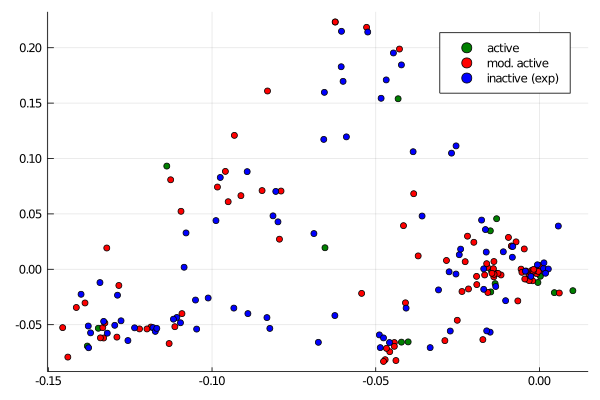

In [43]:
function plotter()
    colors = [:green, :red, :blue]
    labels = ["active", "mod. active", "inactive (exp)"]
    fig = Plots.plot()

    for i in 1:3
        scatter!(fig, (projS2[indices[i], 1], projS2[indices[i], 2]), label=labels[i], mc = colors[i])
    end
    savefig("/home/mfat/Master-Thesis/thesis/Fig/exampprot.png")
    return fig
end

plotter()

PCA cant explain these vectors well enough in 2 dimensions! (highest explaind variance 3%...)
Let's build a simple classifier and test this. We will compare a test sequence to the 4 class hdvs and assume the lowest hamming distance to be the class

In [41]:
function predict(seq)
    y = [hamming(active_hdv, seq), hamming(modactive_hdv, seq), hamming(notactive_exp_hdv, seq), hamming(notactive_virt_hdv, seq)]
    return findmin(y)[2]
end

predict (generic function with 1 method)

Classifier seems to work okay

In [42]:
using MLDataPattern
v = []
for i in 1:100
    (X_train,y_train), (X_test,y_test) = stratifiedobs((data.hdv, data.class_num), p = 0.8)
    
    active_hdv_t = bitadd(hcat([X_train[i] for i in 1:length(y_train) if y_train[i] == 1])...)
    modactive_hdv_t = bitadd(hcat([X_train[i] for i in 1:length(y_train) if y_train[i] == 2])...)
    notactive_exp_hdv_t = bitadd(hcat([X_train[i] for i in 1:length(y_train) if y_train[i] == 3])...)
    notactive_virt_hdv_t = bitadd(hcat([X_train[i] for i in 1:length(y_train) if y_train[i] == 4])...)

    pred = [predict(i) for i in X_test]
    push!(v, mean(y_test .== pred))
end

mean(v)


UndefVarError: UndefVarError: mean not defined